<a href="https://colab.research.google.com/github/nrjcs/iitpbse/blob/master/dl/day1/XOR_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of XOR gate

In [2]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


## Use one of the training sets: set 1 or set 2

In [3]:
# Training set 1
# This will be used to train the network

# Input to the gate
x_train = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]], "uint8") 

# Ouput of the gate, the truth value
y_train = np.array([[0],[1],[1],[0],[1],[0],[0],[1]], "uint8")

In [35]:
# # Training set 2 
# # Let us use real nos. instead of binary int values

# # Input to the gate
x_train = np.random.uniform(low = 0, high = 1,size=300)
x_train = np.reshape(x_train, [-1,3])
print(x_train.shape)

# Output or truth values for inputs
y_train = np.zeros([x_train.shape[0]])
print(len(y_train))
for i in range(x_train.shape[0]):
    if x_train[i,0]>=0.5 and x_train[i,1]>=0.5 and x_train[i,2]>=0.5:
        y_train[i]=1
    if x_train[i,0]<0.5 and x_train[i,1]<0.5 and x_train[i,2]<0.5:
        y_train[i]=1
    if x_train[i,0]<0.5 and x_train[i,1]>=0.5 and x_train[i,2]<0.5:
        y_train[i]=1
    if x_train[i,0]>=0.5 and x_train[i,1]<0.5 and x_train[i,2]>=0.5:
        y_train[i]=1
    else:
        y_train[i]=0
        
# # let's check the values in training set
print(x_train[:10])
print(y_train[:10])


(100, 3)
100
[[0.63428171 0.67315388 0.48146076]
 [0.24141581 0.45686927 0.55927565]
 [0.20984952 0.69523257 0.70882523]
 [0.60838979 0.30414623 0.11681238]
 [0.0016207  0.92024905 0.66019689]
 [0.82492549 0.35732705 0.04506585]
 [0.24890631 0.34001843 0.18884586]
 [0.60981892 0.13780266 0.56985952]
 [0.02169028 0.65955613 0.10271127]
 [0.09527162 0.62891247 0.55275652]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## We will discuss two models for XOR and see the concept of linear separability

In [36]:
# Model 1: This model will not perform as desired

# Create neural networks model
# A sequential model is one where layers are stacked one
# after another and there is not skipping, feedback and
# distributed connection

model = Sequential()

# Add a single dense layer to the model
model.add(Dense(1, activation='softmax', input_dim=3))      # first hidden layer


In [46]:
# # Model 2: Observe why this model works better

# # Create neural networks model
# # A sequential model is one where layers are stacked one
# # after another and there is not skipping, feedback and
# # distributed connection

model = Sequential()

# # Define the model layers
# # Compare it will model 1
model.add(Dense(units=2,activation= 'sigmoid',input_dim=3))
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=1,activation='softmax'))

In [47]:
# Check the model summary

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the neural networks model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Train the neural networks model

history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.1100
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.1100
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.1100
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.1100
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.1100
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.1100
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.1100
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.1100
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.1100
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.1100
Epoch 11/1000
4/4 [

In [22]:
# Let's plot some graphs to see how training went by

history.history.keys()

dict_keys(['loss', 'accuracy'])

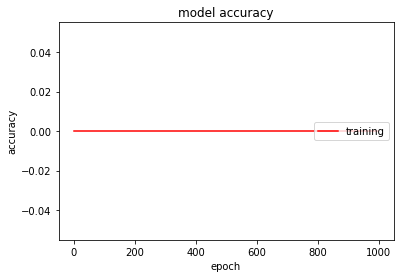

In [23]:
# Behaviour of accuracy over the epochs

plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

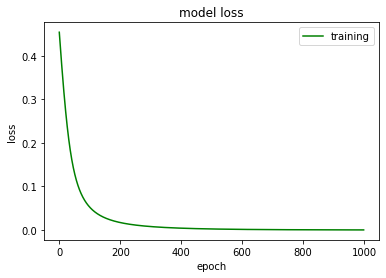

In [24]:
# Behviour of loss over the epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

In [ ]:
# Let's do some prediction

test = np.array([[0.1,0.1]])
model.predict(test,batch_size=1)

array([[1.]], dtype=float32)